# Previous Activation Code 

In [1]:
#This part of the code can be use to generate the .npz files. You should use this if you are planning on
#adding more emotions 
get_ipython().system('pip install tensorflow')
get_ipython().system('pip install Pillow')

# %tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
from keras import backend


from PIL import Image
import os

import numpy as np
from numpy import expand_dims
import matplotlib.pyplot as plt

import glob
#import keract as kt
#import os
#import tensorflow as tf
#import numpy as np

print(tf.__version__)
print(keras.__version__)


# In[129]:


model = VGG16()


# In[83]:


print(model.summary())

2.4.1
2.4.0


2021-07-17 22:57:03.880395: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [3]:
vgg_model = VGG16()
print(vgg_model.summary())

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [4]:
# summarize filter shapes
for layer in vgg_model.layers:
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    # get filter weights
    filters, biases = layer.get_weights()
    print(layer.name, filters.shape)

block1_conv1 (3, 3, 3, 64)
block1_conv2 (3, 3, 64, 64)
block2_conv1 (3, 3, 64, 128)
block2_conv2 (3, 3, 128, 128)
block3_conv1 (3, 3, 128, 256)
block3_conv2 (3, 3, 256, 256)
block3_conv3 (3, 3, 256, 256)
block4_conv1 (3, 3, 256, 512)
block4_conv2 (3, 3, 512, 512)
block4_conv3 (3, 3, 512, 512)
block5_conv1 (3, 3, 512, 512)
block5_conv2 (3, 3, 512, 512)
block5_conv3 (3, 3, 512, 512)


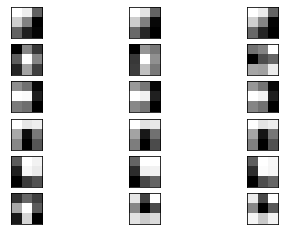

In [5]:
# retrieve weights from the second hidden layer
filters, biases = vgg_model.layers[1].get_weights()
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
# plot first few filters
n_filters, ix = 6, 1
for i in range(n_filters):
    # get the filter
    f = filters[:, :, :, i]
    # plot each channel separately
    for j in range(3):
        # specify subplot and turn of axis
        ax = plt.subplot(n_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(f[:, :, j], cmap='gray')
        ix += 1
# show the figure
plt.show()

In [6]:
# summarize feature map shapes
for i in range(len(vgg_model.layers)):
    layer = vgg_model.layers[i]
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    # summarize output shape
    print(i, layer.name, layer.output.shape)

# redefine model to output right after the first hidden layer
ixs = np.arange(17)
outputs = [vgg_model.layers[i].output for i in ixs]
model = keras.Model(inputs=vgg_model.inputs, outputs=outputs)

1 block1_conv1 (None, 224, 224, 64)
2 block1_conv2 (None, 224, 224, 64)
4 block2_conv1 (None, 112, 112, 128)
5 block2_conv2 (None, 112, 112, 128)
7 block3_conv1 (None, 56, 56, 256)
8 block3_conv2 (None, 56, 56, 256)
9 block3_conv3 (None, 56, 56, 256)
11 block4_conv1 (None, 28, 28, 512)
12 block4_conv2 (None, 28, 28, 512)
13 block4_conv3 (None, 28, 28, 512)
15 block5_conv1 (None, 14, 14, 512)
16 block5_conv2 (None, 14, 14, 512)
17 block5_conv3 (None, 14, 14, 512)


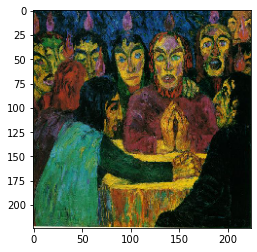

In [7]:
# load the image with the required shape
image = load_img('parentDirectory/emil-nolde_pentecast-1909.jpg', target_size=(224, 224))
# show image
plt.imshow(image)


# convert the image to an array
image = tf.keras.preprocessing.image.img_to_array(image)

In [8]:
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# preprocess image for the vgg model
image = preprocess_input(image)

In [9]:
# expand dimensions so that it represents a single 'sample'
# image = expand_dims(image, axis=0)

In [10]:
# get feature map for first hidden layer
feature_maps = model.predict(image)

2021-07-17 22:58:27.962158: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


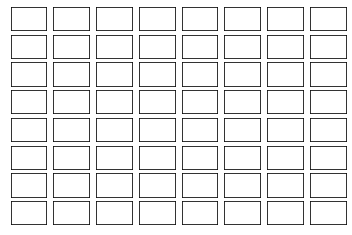

In [12]:
# plot the output from each block
square = 8

#feature_maps = [feature_maps[16]]

for fmap in feature_maps: #change this to less **
    # plot all 64 maps in an 8x8 squares
    ix = 1
    for _ in range(square):
        for _ in range(square):
            # specify subplot and turn of axis
            ax = plt.subplot(square, square, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            # plot filter channel in grayscale
            #plt.imshow(fmap[0, :, :, ix-1], cmap='gray')
            ix += 1
    # show the figure
    #plt.show()

# Activation Processing

In [15]:
# load images to memory
import os

# change this on your machine!
parent_dir = "" #Add the parent directory for all of paintings you are trying to create the average gram matrix of.

# load in total_num images from folder_name location
def get_images(total_num, folder_name):
    images = []
    img_list = os.listdir(f"{parent_dir}/{folder_name}") # returns list
    img_list = [img_name for img_name in img_list if '.jpg' in img_name]
    img_list = img_list[:total_num]
    for img_name in img_list:
        image = load_img(f"{parent_dir}/{folder_name}/{img_name}", target_size=(224, 224))
        image = tf.keras.preprocessing.image.img_to_array(image)
        # reshape data for the model
        image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
        # preprocess image for the vgg model
        image = preprocess_input(image)
        images.append(image)
    return images

# get feature maps at fmap_index layer for all images
def get_activations(images, fmap_index):
    activations = []
    for img in images:
        feature_maps = model.predict(img)
        fmap = feature_maps[fmap_index]
        activations.append(fmap)
    activations = np.array(activations)
    return activations

# get mean across activations
def get_activation_mean(activations):
    activation_mean = np.sum(activations, axis=0) / len(activations)
    return activation_mean

# compute distance between list of activations and given mean
def get_activation_dists(activations, activation_mean):
    activation_dists = []
    for activation in activations:
        activation_dists.append(np.sqrt(np.sum(activation - activation_mean)**2))
    return np.array(activation_dists)

In [18]:
# create sets for 100 excitement and 100 sadness images

disgust_images = get_images(100, "fileWithPaintings")

In [19]:
# get actvations for ALL layers
# change this array to something other than [0..16] for a faster computation
#layers = np.arange(17)
layers = [1, 4, 8, 12, 16]
layer_dict = {}
for layer in layers:
    excite_activations = get_activations(excite_images, layer)
    sad_activations = get_activations(sad_images, layer)
    layer_dict[layer] = (excite_activations, sad_activations)
    print(layer)

1
4
8
12
16


In [20]:
# print out the distance
for key, val in layer_dict.items():

    disgust_mean = get_activation_mean(val[0])

    disgust_disgust_dists = get_activation_dists(val[0], disgust_mean)

    print(f"layer: {key}")
   #mean_diff = np.sqrt(np.sum(excite_mean - sad_mean)**2)
    #print(f" Distance between means: {mean_diff}")
    
    # calculate accuracy of classification by distance to each mean
    #print(np.sum(np.array(excite_excite_dists - excite_sad_dists) <= 0, axis=0))

layer: 1
layer: 4
layer: 8
layer: 12
layer: 16


We observe that a basic linear classification of distance to the mean does not work, meaning that the activations are not easily separable on any of the layers. 

It is possible that the activations on a layer are separable when linearly transformed, but part of the point of using a pre-trained network is that maybe it would already do this work for us.

# Gram Matrix

In [21]:
# gram matrix function from "Creating Art with Conv Neural Nets" 
def gram_matrix(x): 
    features = backend.batch_flatten(backend.permute_dimensions(x, (2, 0, 1)))
    gram = backend.dot(features, backend.transpose(features))
    return gram

# gram matrix function from "Intuitive Guide to Neural Style Transfer"
def define_style_matrix(layer_out):
    """
    This function computes the style matrix, which essentially computes
    how correlated the activations of a given filter to all the other filers.
    Therefore, if there are C channels, the matrix will be of size C x C
    """
    n_channels = layer_out.shape[-1]
    unwrapped_out = tf.reshape(layer_out, [-1, n_channels])
    style_matrix = tf.matmul(unwrapped_out, unwrapped_out, transpose_a=True)
    return style_matrix


In [ ]:
#use get_images and run through list

# define a model for computing gram matrix. same as `model` in above code
ixs = [2,5,9,13,17]
outputs = [vgg_model.layers[i].output for i in ixs]
gram_model = keras.Model(inputs=vgg_model.inputs, outputs=outputs)

size = 1800
i = 0
files = glob.glob('/parentDirectory/fileWithPaintings/*.jpg')
for file in files[0:size]:
    print(file)
    print(i)
    i = i + 1

    # load and process an image:
    #would not need to use this if I use get_images
    image = load_img(file, target_size=(224, 224))
    image = tf.keras.preprocessing.image.img_to_array(image)
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    image = preprocess_input(image)

    # get our activations out of the model
    feature_maps = gram_model.predict(image)

    # compute the gram matrix for each layer!
    gms = [define_style_matrix(v) for v in feature_maps]

    #print(gms[0])

    base_path = 'locationToSave.npzFiles'
    
    # get file name for path
    np_file = (file[(file.rindex('\\') + 1) :])
    print("File Name: " + np_file)
    # save as a raw numpy array
    np.savez(os.path.join(base_path, np_file), gms)


/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\albrecht-durer_jesus-boy-with-globe-1493.jpg
0
File Name: albrecht-durer_jesus-boy-with-globe-1493.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\albrecht-durer_portrait-of-philipp-melanchthon-1526.jpg
1
File Name: albrecht-durer_portrait-of-philipp-melanchthon-1526.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\alfred-sisley_the-seine-at-point-du-jour-1878.jpg
2


C:\Users\evanb\Anaconda\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


File Name: alfred-sisley_the-seine-at-point-du-jour-1878.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\amadeo-de-souza-cardoso_cafe-in-paris-1908.jpg
3
File Name: amadeo-de-souza-cardoso_cafe-in-paris-1908.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\amadeo-de-souza-cardoso_gypsies-1910.jpg
4
File Name: amadeo-de-souza-cardoso_gypsies-1910.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\amadeo-de-souza-cardoso_landscape-1910.jpg
5
File Name: amadeo-de-souza-cardoso_landscape-1910.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\amrita-sher-gil_self-portrait-as-tahitian-1934.jpg
6
File Name: amrita-sher-gil_self-portrait-as-tahitian-1934.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\amrita-sher-gil_sleeping-woman-1933.jpg
7
File Name: amrita-sher-gil_sleeping-woman-1933.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\anders-zorn_a-portrait-of-a-christian-de

File Name: antonio-carneiro_retrato-de-carlos-carneiro-cavaleiro-1928.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\arkhip-kuindzhi_chumaks-path-in-mariupol-1875.jpg
49
File Name: arkhip-kuindzhi_chumaks-path-in-mariupol-1875.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\arkhip-kuindzhi_moonlight-night-on-the-river.jpg
50
File Name: arkhip-kuindzhi_moonlight-night-on-the-river.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\arkhip-kuindzhi_portrait-of-an-unknown-man.jpg
51
File Name: arkhip-kuindzhi_portrait-of-an-unknown-man.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\arthur-dove_red-sun-1935.jpg
52
File Name: arthur-dove_red-sun-1935.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\arthur-segal_schneeschipper-snow-shovellers-1919.jpg
53
File Name: arthur-segal_schneeschipper-snow-shovellers-1919.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\arthur-seg

File Name: camille-pissarro_cowherds-bazincourt.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\camille-pissarro_garden-of-the-louvre-morning-grey-weather-1899.jpg
97
File Name: camille-pissarro_garden-of-the-louvre-morning-grey-weather-1899.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\camille-pissarro_landscape-at-eragny-1890.jpg
98
File Name: camille-pissarro_landscape-at-eragny-1890.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\camille-pissarro_landscape-at-osny.jpg
99
File Name: camille-pissarro_landscape-at-osny.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\camille-pissarro_laundresses-at-eragny-1.jpg
100
File Name: camille-pissarro_laundresses-at-eragny-1.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\camille-pissarro_laundring-women-eragny-sur-eptes-1895.jpg
101
File Name: camille-pissarro_laundring-women-eragny-sur-eptes-1895.jpg
/Users/evanb/Desktop/artemis_official

File Name: constantin-guys_bazar-de-la-volupt-1870.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\constantin-guys_four-women-on-a-sofa.jpg
144
File Name: constantin-guys_four-women-on-a-sofa.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\constantin-guys_in-the-street.jpg
145
File Name: constantin-guys_in-the-street.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\constantin-guys_la-loge-de-l-op-ra.jpg
146
File Name: constantin-guys_la-loge-de-l-op-ra.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\constantin-guys_woman-standing-in-a-doorway.jpg
147
File Name: constantin-guys_woman-standing-in-a-doorway.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\corneliu-baba_self-portrait-with-red-fez-1971.jpg
148
File Name: corneliu-baba_self-portrait-with-red-fez-1971.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\david-burliuk_autumn-forest.jpg
149
File Name: david-bur

File Name: egon-schiele_female-nude-lying-on-her-stomach-1917.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\egon-schiele_fighter-1913.jpg
191
File Name: egon-schiele_fighter-1913.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\egon-schiele_fuchsia-1910.jpg
192
File Name: egon-schiele_fuchsia-1910.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\egon-schiele_girl-in-black-1911.jpg
193
File Name: egon-schiele_girl-in-black-1911.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\egon-schiele_girl-with-hood-1910.jpg
194
File Name: egon-schiele_girl-with-hood-1910.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\egon-schiele_hindering-the-artist-is-a-crime-it-is-murdering-life-in-the-bud-1912.jpg
195
File Name: egon-schiele_hindering-the-artist-is-a-crime-it-is-murdering-life-in-the-bud-1912.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\egon-schiele_house-between-tree

File Name: egon-schiele_self-portrait-with-checkered-shirt-1917.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\egon-schiele_self-portrait-with-chinese-lantern-fruits-1912.jpg
238
File Name: egon-schiele_self-portrait-with-chinese-lantern-fruits-1912.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\egon-schiele_self-portrait-with-hand-to-cheek-1910.jpg
239
File Name: egon-schiele_self-portrait-with-hand-to-cheek-1910.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\egon-schiele_semi-nude-back-view-1918.jpg
240
File Name: egon-schiele_semi-nude-back-view-1918.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\egon-schiele_semi-nude-with-colored-skirt-and-raised-arms-1911.jpg
241
File Name: egon-schiele_semi-nude-with-colored-skirt-and-raised-arms-1911.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\egon-schiele_sitting-woman-1914.jpg
242
File Name: egon-schiele_sitting-woman-1914.jpg
/Use

File Name: emil-nolde_sunset.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\emil-nolde_the-last-supper-1909.jpg
288
File Name: emil-nolde_the-last-supper-1909.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\emil-nolde_the-missionary-1912.jpg
289
File Name: emil-nolde_the-missionary-1912.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\emil-nolde_the-tribute-money-1915.jpg
290
File Name: emil-nolde_the-tribute-money-1915.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\emil-nolde_women-and-pierrot-1917.jpg
291
File Name: emil-nolde_women-and-pierrot-1917.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\endre-balint_self-portrait-1942.jpg
292
File Name: endre-balint_self-portrait-1942.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\endre-balint_smoking-1969.jpg
293
File Name: endre-balint_smoking-1969.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disg

File Name: evelyne-axell_group-therapy-1970.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\evelyne-axell_ice-cream-1964.jpg
338
File Name: evelyne-axell_ice-cream-1964.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\evelyne-axell_ice-cream-blue-version-1967.jpg
339
File Name: evelyne-axell_ice-cream-blue-version-1967.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\evelyne-axell_la-femme-au-serpent.jpg
340
File Name: evelyne-axell_la-femme-au-serpent.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\evelyne-axell_la-tch-que-1969.jpg
341
File Name: evelyne-axell_la-tch-que-1969.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\evelyne-axell_le-baiser-1971.jpg
342
File Name: evelyne-axell_le-baiser-1971.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\evelyne-axell_le-joli-mois-de-mai-1970.jpg
343
File Name: evelyne-axell_le-joli-mois-de-mai-1970.jpg
/Users/evanb/Deskt

File Name: filippo-lippi_dead-christ-supported-by-mary-and-st-john-the-evangelist.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\filippo-lippi_disputation-in-the-synagogue-detail-1465-1.jpg
390
File Name: filippo-lippi_disputation-in-the-synagogue-detail-1465-1.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\forrest-bess_burning-bush-1953.jpg
391
File Name: forrest-bess_burning-bush-1953.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\forrest-bess_it-fits-1955.jpg
392
File Name: forrest-bess_it-fits-1955.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\forrest-bess_red-rain-1967.jpg
393
File Name: forrest-bess_red-rain-1967.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\forrest-bess_spots-1967.jpg
394
File Name: forrest-bess_spots-1967.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\forrest-bess_the-dicks-1946.jpg
395
File Name: forrest-bess_the-dicks-1946.jpg


File Name: francisco-goya_count-fernand-nunez-vii-1803.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\francisco-goya_couple-with-parasol-on-the-paseo-1797.jpg
438
File Name: francisco-goya_couple-with-parasol-on-the-paseo-1797.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\francisco-goya_dead-birds-1812.jpg
439
File Name: francisco-goya_dead-birds-1812.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\francisco-goya_dead-turkey-1812.jpg
440
File Name: francisco-goya_dead-turkey-1812.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\francisco-goya_don-juan-antonio-cuervo-1819.jpg
441
File Name: francisco-goya_don-juan-antonio-cuervo-1819.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\francisco-goya_dona-teresa-sureda.jpg
442
File Name: francisco-goya_dona-teresa-sureda.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\francisco-goya_even-so-he-cannot-make-her-out-17

File Name: francisco-goya_the-count-of-tajo.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\francisco-goya_the-duchess-of-alba-and-her-duenna-1795.jpg
486
File Name: francisco-goya_the-duchess-of-alba-and-her-duenna-1795.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\francisco-goya_the-duke-of-wellington-1814.jpg
487
File Name: francisco-goya_the-duke-of-wellington-1814.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\francisco-goya_the-great-he-goat-or-witches-sabbath.jpg
488
File Name: francisco-goya_the-great-he-goat-or-witches-sabbath.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\francois-boucher_apollo-revealing-his-divinity-to-the-shepherdess-isse-1750.jpg
489
File Name: francois-boucher_apollo-revealing-his-divinity-to-the-shepherdess-isse-1750.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\francois-boucher_diana-getting-out-of-her-bath-1742.jpg
490
File Name: francois-bou

File Name: frans-hals_portrait-of-a-member-of-the-haarlem-civic-guard.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\frans-hals_portrait-of-a-young-man-1.jpg
538
File Name: frans-hals_portrait-of-a-young-man-1.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\frans-hals_portrait-of-a-young-man-with-a-glove.jpg
539
File Name: frans-hals_portrait-of-a-young-man-with-a-glove.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\frans-hals_portrait-of-an-elderly-man.jpg
540
File Name: frans-hals_portrait-of-an-elderly-man.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\frans-hals_portrait-of-an-unknown-man-1634.jpg
541
File Name: frans-hals_portrait-of-an-unknown-man-1634.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\frans-hals_portrait-of-isaac-abrahamsz-1635.jpg
542
File Name: frans-hals_portrait-of-isaac-abrahamsz-1635.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\f

File Name: franz-stuck_naiad-and-faun.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\franz-stuck_orestes-and-the-erinyes-1905.jpg
587
File Name: franz-stuck_orestes-and-the-erinyes-1905.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\franz-stuck_portrait-of-prof-dr-josef-amann-albert-jr-a-gynecologist-a-university-professor-and-art.jpg
588
File Name: franz-stuck_portrait-of-prof-dr-josef-amann-albert-jr-a-gynecologist-a-university-professor-and-art.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\franz-stuck_poster-for-the-international-hygiene-exhibition-1911-in-dresden-1911.jpg
589
File Name: franz-stuck_poster-for-the-international-hygiene-exhibition-1911-in-dresden-1911.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\franz-stuck_salome-1906-1.jpg
590
File Name: franz-stuck_salome-1906-1.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\franz-stuck_sensuality-1891.jpg
591
File Name

File Name: george-frederick-watts_time-death-and-judgement-1886.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\george-luks_house-on-the-point.jpg
640
File Name: george-luks_house-on-the-point.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\george-mavroides_portrait-of-andreas-vurlumis-1960.jpg
641
File Name: george-mavroides_portrait-of-andreas-vurlumis-1960.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\george-segal_picasso-s-chair-1973.jpg
642
File Name: george-segal_picasso-s-chair-1973.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\georges-braque_a-black-pedestal-1919.jpg
643
File Name: georges-braque_a-black-pedestal-1919.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\georges-braque_a-pumpkin-1944.jpg
644
File Name: georges-braque_a-pumpkin-1944.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\georges-braque_a-red-pedestal-1939.jpg
645
File Name: georges

File Name: giovanni-anselmo_specchio-1968.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\giovanni-boldini_a-reclining-nude-on-a-day-bed.jpg
689
File Name: giovanni-boldini_a-reclining-nude-on-a-day-bed.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\giovanni-boldini_adolf-friedrich-erdmann-von-menzel.jpg
690
File Name: giovanni-boldini_adolf-friedrich-erdmann-von-menzel.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\giovanni-boldini_portrait-of-anita-de-la-ferie-the-spanish-dancer-1900.jpg
691
File Name: giovanni-boldini_portrait-of-anita-de-la-ferie-the-spanish-dancer-1900.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\guido-reni_cleopatra-1640.jpg
692
File Name: guido-reni_cleopatra-1640.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\guido-reni_crucifixion-of-st-peter-1605.jpg
693
File Name: guido-reni_crucifixion-of-st-peter-1605.jpg
/Users/evanb/Desktop/artemis_official_data

File Name: gustave-courbet_the-woman-in-the-waves-the-bather-1868.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\gustave-courbet_three-red-apples-1871.jpg
738
File Name: gustave-courbet_three-red-apples-1871.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\gustave-dore_and-seems-a-moving-land-and-at-his-gills-draws-in-and-at-his-trunk-spouts-out-a-sea.jpg
739
File Name: gustave-dore_and-seems-a-moving-land-and-at-his-gills-draws-in-and-at-his-trunk-spouts-out-a-sea.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\gustave-dore_arachne.jpg
740
File Name: gustave-dore_arachne.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\gustave-dore_david-slays-goliath.jpg
741
File Name: gustave-dore_david-slays-goliath.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\gustave-dore_don-quixote-110.jpg
742
File Name: gustave-dore_don-quixote-110.jpg
/Users/evanb/Desktop/artemis_official_data/official_da

File Name: henk-peeters_pyrographie-both-sides-flames-1959.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\henk-peeters_pyrography-on-linen-1959.jpg
787
File Name: henk-peeters_pyrography-on-linen-1959.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\henk-peeters_untitled-3.jpg
788
File Name: henk-peeters_untitled-3.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\henk-peeters_untitled-61-03-1961.jpg
789
File Name: henk-peeters_untitled-61-03-1961.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\henri-catargi_landscape-in-arges-valley-1932.jpg
790
File Name: henri-catargi_landscape-in-arges-valley-1932.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\henri-catargi_nude.jpg
791
File Name: henri-catargi_nude.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\henri-de-toulouse-lautrec_abandonment-the-pair-1895.jpg
792
File Name: henri-de-toulouse-lautrec_abandonment-the-p

File Name: henri-de-toulouse-lautrec_portrait-of-vincent-van-gogh-1887.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\henri-de-toulouse-lautrec_reine-de-joie-1892.jpg
830
File Name: henri-de-toulouse-lautrec_reine-de-joie-1892.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\henri-de-toulouse-lautrec_self-portrait-caricature-1885.jpg
831
File Name: henri-de-toulouse-lautrec_self-portrait-caricature-1885.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\henri-de-toulouse-lautrec_study-of-a-dancer-1888.jpg
832
File Name: henri-de-toulouse-lautrec_study-of-a-dancer-1888.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\henri-de-toulouse-lautrec_the-ambassadors-people-chics-1893.jpg
833
File Name: henri-de-toulouse-lautrec_the-ambassadors-people-chics-1893.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\henri-de-toulouse-lautrec_the-bartender-1900.jpg
834
File Name: henri-de-toulouse-lautre

File Name: heorhiy-narbut_illustration-to-three-fables-of-krylov-1911-2.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\heorhiy-narbut_illustration-to-three-fables-of-krylov-1911.jpg
874
File Name: heorhiy-narbut_illustration-to-three-fables-of-krylov-1911.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\heorhiy-narbut_illustration-to-wooden-eagle-1909-4.jpg
875
File Name: heorhiy-narbut_illustration-to-wooden-eagle-1909-4.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\heorhiy-narbut_portrait-of-b-khmelnitsky.jpg
876
File Name: heorhiy-narbut_portrait-of-b-khmelnitsky.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\horia-bernea_the-column.jpg
877
File Name: horia-bernea_the-column.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\horia-bernea_tile-roofs.jpg
878
File Name: horia-bernea_tile-roofs.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\horia-damian_etrava-a

File Name: jacob-jordaens_the-rest-of-diana.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\jacob-jordaens_the-return-from-egypt-of-the-holy-family-1616.jpg
925
File Name: jacob-jordaens_the-return-from-egypt-of-the-holy-family-1616.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\jacob-jordaens_two-studies-of-the-head-of-abraham-grapheus-1621.jpg
926
File Name: jacob-jordaens_two-studies-of-the-head-of-abraham-grapheus-1621.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\jacoba-van-heemskerck_abstract-composition.jpg
927
File Name: jacoba-van-heemskerck_abstract-composition.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\jacopo-pontormo_portrait-of-ludovico-martelli.jpg
928
File Name: jacopo-pontormo_portrait-of-ludovico-martelli.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\jacopo-pontormo_portrait-of-two-friends.jpg
929
File Name: jacopo-pontormo_portrait-of-two-friends.jpg
/Use

File Name: karl-schrag_forms-of-trees-and-clouds.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\karl-schrag_grey-mood-deer-isle-1981.jpg
974
File Name: karl-schrag_grey-mood-deer-isle-1981.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\karl-schrag_woods-and-open-sea-1962.jpg
975
File Name: karl-schrag_woods-and-open-sea-1962.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\karoly-ferenczy_deposition-from-the-cross-1903.jpg
976
File Name: karoly-ferenczy_deposition-from-the-cross-1903.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\kay-nielsen_the-princess-and-the-pea.jpg
977
File Name: kay-nielsen_the-princess-and-the-pea.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\kazuo-nakamura_into-space-3-1957.jpg
978
File Name: kazuo-nakamura_into-space-3-1957.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\kenzo-okada_decision-1956.jpg
979
File Name: kenzo-okada_decis

File Name: konstantin-somov_naked-among-the-flowers.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\konstantin-somov_natalia-pavlovna-and-earl-nulin.jpg
1022
File Name: konstantin-somov_natalia-pavlovna-and-earl-nulin.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\konstantin-somov_portrait-of-f-sologub.jpg
1023
File Name: konstantin-somov_portrait-of-f-sologub.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\konstantin-somov_portrait-of-m-braykevich.jpg
1024
File Name: konstantin-somov_portrait-of-m-braykevich.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\konstantin-somov_rainbow-2.jpg
1025
File Name: konstantin-somov_rainbow-2.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\konstantin-somov_rest-after-a-walk.jpg
1026
File Name: konstantin-somov_rest-after-a-walk.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\konstantin-somov_self-portrait-3.jpg
1027
File Nam

File Name: lee-krasner_gold-stone-1969.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\lee-krasner_hieroglyphs-no-12-1969.jpg
1069
File Name: lee-krasner_hieroglyphs-no-12-1969.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\lee-krasner_night-light-1948.jpg
1070
File Name: lee-krasner_night-light-1948.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\lee-krasner_noon-1947.jpg
1071
File Name: lee-krasner_noon-1947.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\lee-krasner_obsidian-1962.jpg
1072
File Name: lee-krasner_obsidian-1962.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\lee-krasner_seated-nude-1940.jpg
1073
File Name: lee-krasner_seated-nude-1940.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\lee-krasner_thaw-1957.jpg
1074
File Name: lee-krasner_thaw-1957.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\lee-krasner_the-sun-woman-ii-195

File Name: louise-elisabeth-vigee-le-brun_portrait-of-count-pavel-shuvalov-1799.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\louise-elisabeth-vigee-le-brun_portrait-of-lisabeth-of-france.jpg
1116
File Name: louise-elisabeth-vigee-le-brun_portrait-of-lisabeth-of-france.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\louise-elisabeth-vigee-le-brun_portrait-of-madame-de-stael-as-corinne-1808.jpg
1117
File Name: louise-elisabeth-vigee-le-brun_portrait-of-madame-de-stael-as-corinne-1808.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\louise-elisabeth-vigee-le-brun_portrait-of-maria-carolina-of-austria-1791.jpg
1118
File Name: louise-elisabeth-vigee-le-brun_portrait-of-maria-carolina-of-austria-1791.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\louise-elisabeth-vigee-le-brun_portrait-of-mme-d-aguesseau.jpg
1119
File Name: louise-elisabeth-vigee-le-brun_portrait-of-mme-d-aguesseau.jpg
/Users/evanb/Desktop

File Name: marc-chagall_sarah-and-abimelech-1960.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\marc-chagall_self-portrait-1960.jpg
1165
File Name: marc-chagall_self-portrait-1960.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\marc-chagall_self-portrait-1963.jpg
1166
File Name: marc-chagall_self-portrait-1963.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\marc-chagall_selifan.jpg
1167
File Name: marc-chagall_selifan.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\marc-chagall_sketch-for-meeting-of-isaac-and-rebecca-1980.jpg
1168
File Name: marc-chagall_sketch-for-meeting-of-isaac-and-rebecca-1980.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\marc-chagall_so-i-came-forth-of-the-sea-1948.jpg
1169
File Name: marc-chagall_so-i-came-forth-of-the-sea-1948.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\marc-chagall_sobakevich-at-table.jpg
1170
File Name: marc-cha

File Name: marc-chagall_untitled-the-cover-of-bible-1960.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\marc-chagall_untitled.jpg
1213
File Name: marc-chagall_untitled.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\marc-chagall_wedding-1918.jpg
1214
File Name: marc-chagall_wedding-1918.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\marc-chagall_youthfulness-1985.jpg
1215
File Name: marc-chagall_youthfulness-1985.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\marcel-duchamp_landscape-at-blainville-1902.jpg
1216
File Name: marcel-duchamp_landscape-at-blainville-1902.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\marcel-duchamp_paradise-adam-and-eve.jpg
1217
File Name: marcel-duchamp_paradise-adam-and-eve.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\marcel-duchamp_standing-nude-1910-1.jpg
1218
File Name: marcel-duchamp_standing-nude-1910-1.jpg
/Users/evanb/

File Name: mark-tobey_untitled-1966.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\mark-tobey_untitled-1968.jpg
1267
File Name: mark-tobey_untitled-1968.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\mark-tobey_world-eggsharpen.jpg
1268
File Name: mark-tobey_world-eggsharpen.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\martiros-saryan_costume-design-for-the-opera-by-rimsky-korsakov-s-golden-cockerel-1931-1.jpg
1269
File Name: martiros-saryan_costume-design-for-the-opera-by-rimsky-korsakov-s-golden-cockerel-1931-1.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\martiros-saryan_evening-in-the-garden-1903.jpg
1270
File Name: martiros-saryan_evening-in-the-garden-1903.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\martiros-saryan_mules-laden-with-hay-1910.jpg
1271
File Name: martiros-saryan_mules-laden-with-hay-1910.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disg

File Name: maurice-quentin-de-la-tour_portrait-of-marie-fel-1757.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\maurice-quentin-de-la-tour_portrait-of-marie-leszczy-ska-queen-of-france-1748.jpg
1313
File Name: maurice-quentin-de-la-tour_portrait-of-marie-leszczy-ska-queen-of-france-1748.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\maurice-quentin-de-la-tour_portrait-of-maurice-of-saxony-1747.jpg
1314
File Name: maurice-quentin-de-la-tour_portrait-of-maurice-of-saxony-1747.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\maurice-quentin-de-la-tour_portrait-of-maurice-of-saxony.jpg
1315
File Name: maurice-quentin-de-la-tour_portrait-of-maurice-of-saxony.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\maurice-quentin-de-la-tour_portrait-of-unknown-man-1.jpg
1316
File Name: maurice-quentin-de-la-tour_portrait-of-unknown-man-1.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\maurice-qu

File Name: morris-graves_bird-of-the-spirit-1943.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\morris-graves_bird-singing-in-the-moonlight-1939.jpg
1358
File Name: morris-graves_bird-singing-in-the-moonlight-1939.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\morris-graves_chalice-1941.jpg
1359
File Name: morris-graves_chalice-1941.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\morris-graves_vessel-in-a-drift-of-diamond-light-in-the-sky-of-the-mind-1944.jpg
1360
File Name: morris-graves_vessel-in-a-drift-of-diamond-light-in-the-sky-of-the-mind-1944.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\morris-louis_number-1-1957.jpg
1361
File Name: morris-louis_number-1-1957.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\morris-louis_untitled-d11-1949.jpg
1362
File Name: morris-louis_untitled-d11-1949.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\morris-louis_un

File Name: olexandr-archipenko_seated-female-nude-black-torso-1911.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\olexandr-archipenko_seated-female-nude-with-left-hand-on-right-leg.jpg
1408
File Name: olexandr-archipenko_seated-female-nude-with-left-hand-on-right-leg.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\olexandr-archipenko_seated-nude-1920.jpg
1409
File Name: olexandr-archipenko_seated-nude-1920.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\olexandr-archipenko_standing-woman.jpg
1410
File Name: olexandr-archipenko_standing-woman.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\olexandr-archipenko_the-appointment-of-the-four-forms-from-the-portfolio-life-forms.jpg
1411
File Name: olexandr-archipenko_the-appointment-of-the-four-forms-from-the-portfolio-life-forms.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\olexandr-archipenko_the-past.jpg
1412
File Name: olexandr-arch

File Name: pablo-picasso_flowers-on-the-table-1907.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\pablo-picasso_francoise-gilot-with-paloma-and-claude-1951.jpg
1456
File Name: pablo-picasso_francoise-gilot-with-paloma-and-claude-1951.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\pablo-picasso_glass-1914.jpg
1457
File Name: pablo-picasso_glass-1914.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\pablo-picasso_glass-and-fruits-1908.jpg
1458
File Name: pablo-picasso_glass-and-fruits-1908.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\pablo-picasso_glass-and-pitcher-1944.jpg
1459
File Name: pablo-picasso_glass-and-pitcher-1944.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\pablo-picasso_guitar-on-pedestal-1920-2.jpg
1460
File Name: pablo-picasso_guitar-on-pedestal-1920-2.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\pablo-picasso_harlequin-and-woman-with-neck

File Name: paula-modersohn-becker_standing-female-nude.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\pavel-filonov_easter-1913.jpg
1505
File Name: pavel-filonov_easter-1913.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\pavel-filonov_landscape-with-two-animals.jpg
1506
File Name: pavel-filonov_landscape-with-two-animals.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\peder-severin-kroyer_beach-of-skagen-1892.jpg
1507
File Name: peder-severin-kroyer_beach-of-skagen-1892.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\peter-paul-rubens_albert-rubens.jpg
1508
File Name: peter-paul-rubens_albert-rubens.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\peter-paul-rubens_assumption-of-virgin-1.jpg
1509
File Name: peter-paul-rubens_assumption-of-virgin-1.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\peter-paul-rubens_beheading-of-st-john-the-baptist-1610.jpg
1510
Fi

File Name: ronnie-landfield_taurean-entrance-1973.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\ronnie-landfield_untitled-1969(2).jpg
1555
File Name: ronnie-landfield_untitled-1969(2).jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\ronnie-landfield_vivid-spring-1988.jpg
1556
File Name: ronnie-landfield_vivid-spring-1988.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\ronnie-landfield_yellow-line-painting-1973.jpg
1557
File Name: ronnie-landfield_yellow-line-painting-1973.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\roy-lichtenstein_bull-vi-1973(1).jpg
1558
File Name: roy-lichtenstein_bull-vi-1973(1).jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\roy-lichtenstein_woman-with-hat.jpg
1559
File Name: roy-lichtenstein_woman-with-hat.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\rudolf-von-alt_view-of-bad-gastein-1888.jpg
1560
File Name: rudolf-von-alt_view-of

File Name: sam-francis_untitled-1958-1.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\sam-francis_untitled-1959-1.jpg
1606
File Name: sam-francis_untitled-1959-1.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\sam-francis_untitled-1960-1.jpg
1607
File Name: sam-francis_untitled-1960-1.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\sam-francis_untitled-1964-2.jpg
1608
File Name: sam-francis_untitled-1964-2.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\sam-francis_untitled-1965(1).jpg
1609
File Name: sam-francis_untitled-1965(1).jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\sam-francis_untitled-1965-2.jpg
1610
File Name: sam-francis_untitled-1965-2.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\sam-francis_untitled-1966(2).jpg
1611
File Name: sam-francis_untitled-1966(2).jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\sam-francis_untitl

File Name: samuel-mutzner_trandafiri-la-balcic-1930.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\saul-steinberg_head-1945.jpg
1659
File Name: saul-steinberg_head-1945.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\saul-steinberg_las-vegas-1985.jpg
1660
File Name: saul-steinberg_las-vegas-1985.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\sean-scully_beach.jpg
1661
File Name: sean-scully_beach.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\sean-scully_bridge-1991.jpg
1662
File Name: sean-scully_bridge-1991.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\sean-scully_cradle-1985.jpg
1663
File Name: sean-scully_cradle-1985.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\sean-scully_raval-rojo-2004.jpg
1664
File Name: sean-scully_raval-rojo-2004.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\sean-scully_wall-of-light-desert-night-1999.jpg

File Name: theodoros-stamos_infinity-field-lefkada-series-i-1980.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\theodoros-stamos_infinity-field-olympia-ii-1969.jpg
1710
File Name: theodoros-stamos_infinity-field-olympia-ii-1969.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\theodoros-stamos_olympia-sun-box-1957.jpg
1711
File Name: theodoros-stamos_olympia-sun-box-1957.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\theodoros-stamos_purple-color-field-with-two-green-lines.jpg
1712
File Name: theodoros-stamos_purple-color-field-with-two-green-lines.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\theodoros-stamos_sun-moon-chalice-ii-1962.jpg
1713
File Name: theodoros-stamos_sun-moon-chalice-ii-1962.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\theodoros-stamos_sunbox-1966.jpg
1714
File Name: theodoros-stamos_sunbox-1966.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/D

File Name: walasse-ting_fireworks-1973.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\walter-battiss_a-rare-plant.jpg
1759
File Name: walter-battiss_a-rare-plant.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\walter-battiss_bending-figures.jpg
1760
File Name: walter-battiss_bending-figures.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\walter-battiss_bird-on-foot.jpg
1761
File Name: walter-battiss_bird-on-foot.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\walter-battiss_bird-tree-man.jpg
1762
File Name: walter-battiss_bird-tree-man.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\walter-battiss_birth-of-a-new-nation.jpg
1763
File Name: walter-battiss_birth-of-a-new-nation.jpg
/Users/evanb/Desktop/artemis_official_data/official_data/Disgust\walter-battiss_coco-de-mer-seychelles-1970.jpg
1764
File Name: walter-battiss_coco-de-mer-seychelles-1970.jpg
/Users/evanb/Desktop/artemis_of

In [ ]:
files = glob.glob('/locationToSave.npzFiles/*.npz')

list1 = []
list2 = []
list3 = []
list4 = []
list5 = []

size = 2600
updatedSize = 2600
for file in files[0:size]:
    #load gms
    #print("Test: " + file)
    gmLoad = np.load(file, allow_pickle = True)
    #print(gmTest.files)
    try:
        gms = gmLoad['arr_0']
    except:
        print("bad image")
        updatedSize = updatedSize - 1
    
    #add layers to layer lists
    #print(gms[1])
    list1.append(gms[0])
    list2.append(gms[1])
    list3.append(gms[2])
    list4.append(gms[3])
    list5.append(gms[4])

#average individual layer lists 
list1Avg = np.sum(list1, axis=0) / updatedSize
list2Avg = np.sum(list2, axis=0) / updatedSize
list3Avg = np.sum(list3, axis=0) / updatedSize
list4Avg = np.sum(list4, axis=0) / updatedSize
list5Avg = np.sum(list5, axis=0) / updatedSize

#save combined gms
final = []
final.append(list1Avg)
final.append(list2Avg)
final.append(list3Avg)
final.append(list4Avg)
final.append(list5Avg)

base_path = '/locationToSave.npzFiles'
    
# save as a raw numpy array
np.savez(os.path.join(base_path, "fileName"), final)